In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(42)  # for reproducibility

n_steps = 50        # number of time steps
dt = 1.0            # time step

true_velocity = 1.0    #constant velocity
position = 0.0

In [13]:
true_positions = []
measurements = []

measurement_noise_std = 2.0  # sensor noise (R)

for _ in range(n_steps):
    acceleration = np.random.randn() * 0.2           # added random acceleration
    
    true_velocity += acceleration * dt
    position += true_velocity * dt

    true_positions.append(position)
    
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)

In [14]:
# Initial state estimate (position only)
x_est = np.array([[0.0],
                  [0.0]])

# Initial uncertainty
P = np.eye(2) * 500  # initial uncertainty

# State transition matrix
F = np.array([[1, dt],
              [0, 1]])

# Measurement matrix
H = np.array([[1, 0]])

# Process noise (model uncertainty)
R = np.array([[measurement_noise_std**2]])

# Measurement noise (sensor uncertainty)
Q = np.array([[0.1, 0],
              [0, 0.1]])

In [15]:
estimates = []
prediction_only = []

for z in measurements:

    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    prediction_only.append(x_pred[0, 0])

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    x_est = x_pred + K @ (z - H @ x_pred)
    P = (np.eye(2) - K @ H) @ P_pred

    estimates.append(x_est[0, 0])

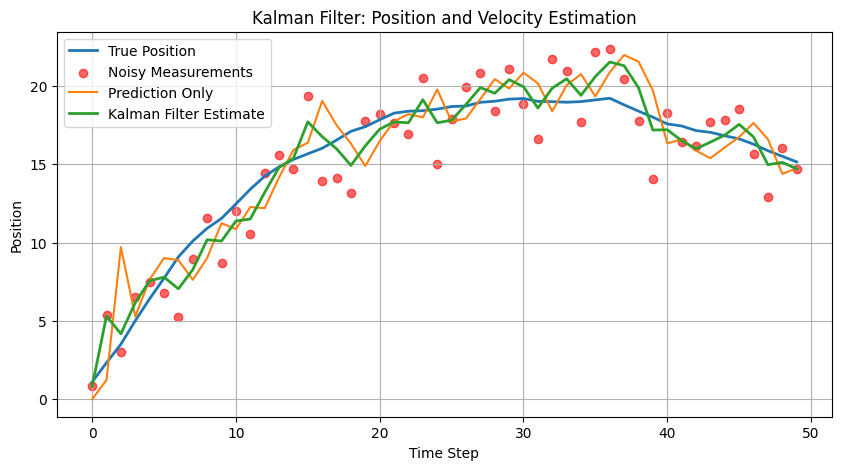

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(prediction_only, label="Prediction Only")
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)

plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Kalman Filter: Position and Velocity Estimation")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
measurement_noise_std = 5.0
R = np.array([[measurement_noise_std**2]])

In [18]:
Q = np.eye(2) * 1.0

In [19]:
P = np.eye(2) * 0.01

In [20]:
x_est = np.array([[100.0],
                  [-10.0]])